## This notebook shows how to use Orchestrator APIs for user experiments

In [2]:
import os
from fabrictestbed.slice_manager import SliceManager, Status
import json

In [3]:
credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
print(f"CM Host: {credmgr_host} Orchestrator Host: {orchestrator_host}")

CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


In [4]:
slice_manager = SliceManager(oc_host=orchestrator_host, cm_host=credmgr_host, project_name='all', scope='all')

# Initialize the slice manager
slice_manager.initialize()

In [5]:
status, advertised_topology = slice_manager.resources()

print(f"Status: {status}")
if status == Status.OK:
    print(f"Toplogy: {advertised_topology}")
else:
    print(f"Error: {advertised_topology}")

Status: Status.OK
Toplogy: LBNL: { cpu: 6/6 , core: 180/192 , ram: 1,524/1,536 G, disk: 9,580/9,600 G, unit: 3/3 }
	Components:
		NVME-P4510:  NVME P4510 { disk: 9,000/10,000 G, unit: 9/10 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 0/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
	Site Interfaces:
UKY: { cpu: 6/6 , core: 190/192 , ram: 1,530/1,536 G, disk: 9,590/9,600 G, unit: 3/3 }
	Components:
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, unit: 10/10 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 1/2 }
	Site Interfaces:
RENC: { cpu: 6/6 , core: 182/192 , ram: 1,510/1,536 G, disk: 14,350/14,400 G

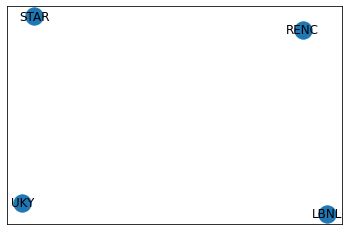

In [6]:
if status == Status.OK:
    advertised_topology.draw()

## Create Slice

In [132]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, ComponentModelType, ServiceType
# Create topology
t = ExperimentTopology()


# Add node
n1 = t.add_node(name='master_node', site='RENC')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=4, disk=10)

# Set Properties
n1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_ubuntu_20')


# Add node
n2 = t.add_node(name='client_node', site='RENC')

# Set properties
n2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_ubuntu_20')


# Generate Slice Graph
slice_graph = t.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice-Kubernetes-Hello-World', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")

Response Status Status.OK
Reservations created [{
    "graph_node_id": "43000ee2-b25e-434c-aa5a-ac2f1512256c",
    "lease_end": "2021-09-09 03:06:28",
    "pending_state": "None_",
    "reservation_id": "2467ac38-fdd6-4b85-a46d-9c1d8cc969ac",
    "reservation_state": "Unknown",
    "slice_id": "320132c4-7c6e-44ee-a6c3-7e45b529283e"
}, {
    "graph_node_id": "10eb36c0-beaa-4656-be50-3ed4c928d3a7",
    "lease_end": "2021-09-09 03:06:28",
    "pending_state": "None_",
    "reservation_id": "7e256e59-27b6-46e1-923c-6c8bd706b081",
    "reservation_state": "Unknown",
    "slice_id": "320132c4-7c6e-44ee-a6c3-7e45b529283e"
}]


In [133]:
# Set the Slice ID from output of the above command
slice_id=reservations[0].slice_id
print(slice_id)

320132c4-7c6e-44ee-a6c3-7e45b529283e


## Query Slices

In [135]:
status, slices = slice_manager.slices()

print("Response Status {}".format(status))
if status == Status.OK:
    print("Slices {}".format(slices))
else:
    print(f"Failure: {slices}")

Response Status Status.OK
Slices [{
    "graph_id": "c758ff0d-22f6-4195-89fe-500b5e4392bf",
    "lease_end": "2021-09-04 00:13:06",
    "slice_id": "060aa897-aa4b-4d5a-93c6-4403dbdef3af",
    "slice_name": "Slice-l2p2p-ded",
    "slice_state": "Closing"
}, {
    "graph_id": "a7926813-a654-4a67-bd97-9870003f9d0a",
    "lease_end": "2021-09-08 20:28:58",
    "slice_id": "886217e4-5533-4053-99c4-a855064cb849",
    "slice_name": "Slice-l2bridge-ded-tag",
    "slice_state": "Closing"
}, {
    "graph_id": "20a42635-8ad7-4277-b8c8-04988829b7f4",
    "lease_end": "2021-09-08 20:29:22",
    "slice_id": "9b412865-2083-4d64-8fd2-99f4d46ed8ff",
    "slice_name": "Slice-l2bridge-ded-tag",
    "slice_state": "Closing"
}, {
    "graph_id": "343c1157-2d7a-4043-9762-e6ca19596cf2",
    "lease_end": "2021-09-04 00:17:40",
    "slice_id": "eb71d173-0afa-48d0-b048-d5cde51a9e34",
    "slice_name": "Slice-l2p2p-ded",
    "slice_state": "Closing"
}, {
    "graph_id": "bbdac2cc-6d88-4595-9146-23bfe1e356c4",
  

## Query Slivers

In [136]:
status, slivers = slice_manager.slivers(slice_id=slice_id)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Slivers {}".format(slivers))
else:
    print(f"Failure: {slivers}")

Response Status Status.OK
Slivers [{
    "allocated_capacities": "{\"core\": 2, \"disk\": 10, \"ram\": 8}",
    "allocated_labels": "{\"instance\": \"instance-00000211\", \"instance_parent\": \"renc-w1.fabric-testbed.net\"}",
    "capacities": "{\"core\": 2, \"disk\": 10, \"ram\": 4}",
    "capacity_hints": "{\"instance_type\": \"fabric.c2.m8.d10\"}",
    "graph_node_id": "43000ee2-b25e-434c-aa5a-ac2f1512256c",
    "join_state": "NoJoin",
    "lease_end": "2021-09-09 03:06:28",
    "management_ip": "152.54.15.37",
    "name": "master_node",
    "pending_state": "None_",
    "reservation_id": "2467ac38-fdd6-4b85-a46d-9c1d8cc969ac",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "320132c4-7c6e-44ee-a6c3-7e45b529283e"
}, {
    "allocated_capacities": "{\"core\": 2, \"disk\": 10, \"ram\": 8}",
    "allocated_labels": "{\"instance\": \"instance-00000212\", \"instance_parent\": \"renc-w1.fabric-testbed.net\"}",
    "capacities": "{\"core\": 

## Sliver Status

In [137]:
for s in slivers:
    status, sliver_status = slice_manager.sliver_status(slice_id=slice_id, sliver_id=s.reservation_id)

    print("Response Status {}".format(status))
    if status == Status.OK:
        print()
        print("Sliver Status {}".format(sliver_status))
        print()

Response Status Status.OK

Sliver Status {
    "allocated_capacities": "{\"core\": 2, \"disk\": 10, \"ram\": 8}",
    "allocated_labels": "{\"instance\": \"instance-00000211\", \"instance_parent\": \"renc-w1.fabric-testbed.net\"}",
    "capacities": "{\"core\": 2, \"disk\": 10, \"ram\": 4}",
    "capacity_hints": "{\"instance_type\": \"fabric.c2.m8.d10\"}",
    "graph_node_id": "43000ee2-b25e-434c-aa5a-ac2f1512256c",
    "join_state": "NoJoin",
    "lease_end": "2021-09-09 03:06:28",
    "management_ip": "152.54.15.37",
    "name": "master_node",
    "notices": "Reservation 2467ac38-fdd6-4b85-a46d-9c1d8cc969ac (Slice Slice-Kubernetes-Hello-World(320132c4-7c6e-44ee-a6c3-7e45b529283e) Graph Id:ae244672-53a5-4b8b-8117-ab4f915914e8 Owner:name: orchestrator guid: orchestrator-guid email: minawm@bu.edu State:StableOK ) is in state [Active,None_]\n\nLast ticket update: \nTicket events: \nLast ticket update: \nTicket events: ",
    "pending_state": "None_",
    "reservation_id": "2467ac38-fdd6

## Work on the servers starts here.

### We are going to use paramiko to connect to our servers through ssh.

In [138]:
import paramiko

### We have two servers with two IPs.

In [139]:
master_node_ip = list(filter(lambda sliver : sliver.name == "master_node",slivers))[0].management_ip
master_node_ip

'152.54.15.37'

In [140]:
client_node_ip = list(filter(lambda sliver : sliver.name == "client_node",slivers))[0].management_ip
client_node_ip

'152.54.15.48'

### Below, we connect to our first server.

In [141]:
key = paramiko.RSAKey.from_private_key_file("/home/fabric/.ssh/id_rsa")
master_node = paramiko.SSHClient()
master_node.load_system_host_keys()
master_node.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())

master_node.set_missing_host_key_policy(paramiko.AutoAddPolicy())
master_node.connect(master_node_ip,username='ubuntu',pkey = key)

master_node

### Connection should be established. Let's issue some test commands:

In [142]:
stdin, stdout, stderr = master_node.exec_command('lsb_release -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.2 LTS
Release:	20.04
Codename:	focal

No LSB modules are available.



In [143]:
stdin, stdout, stderr = master_node.exec_command('ip addr')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host 
       valid_lft forever preferred_lft forever
2: ens3: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 9000 qdisc fq_codel state UP group default qlen 1000
    link/ether fa:16:3e:69:e3:ef brd ff:ff:ff:ff:ff:ff
    inet 10.20.4.74/24 brd 10.20.4.255 scope global dynamic ens3
       valid_lft 86308sec preferred_lft 86308sec
    inet6 fe80::f816:3eff:fe69:e3ef/64 scope link 
       valid_lft forever preferred_lft forever




In [144]:
stdin, stdout, stderr = master_node.exec_command('curl https://ipinfo.io/ip')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

152.54.15.37
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    12  100    12    0     0    101      0 --:--:-- --:--:-- --:--:--   101



### Now we connect to our second server.

In [145]:
key = paramiko.RSAKey.from_private_key_file("/home/fabric/.ssh/id_rsa")
client_node = paramiko.SSHClient()
client_node.load_system_host_keys()
client_node.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())

client_node.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client_node.connect(client_node_ip,username='ubuntu',pkey = key)

client_node

### Again, some test commands.

In [146]:
stdin, stdout, stderr = client_node.exec_command('curl https://ipinfo.io/ip')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

152.54.15.48
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    12  100    12    0     0    200      0 --:--:-- --:--:-- --:--:--   200



### Now, let's do a quick ping experiment. Let's let each of the servers ping the other server.

In [147]:
stdin, stdout, stderr = client_node.exec_command('ping -c 10 ' + master_node_ip)
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

PING 152.54.15.37 (152.54.15.37) 56(84) bytes of data.
64 bytes from 152.54.15.37: icmp_seq=1 ttl=63 time=0.394 ms
64 bytes from 152.54.15.37: icmp_seq=2 ttl=63 time=0.316 ms
64 bytes from 152.54.15.37: icmp_seq=3 ttl=63 time=0.535 ms
64 bytes from 152.54.15.37: icmp_seq=4 ttl=63 time=0.205 ms
64 bytes from 152.54.15.37: icmp_seq=5 ttl=63 time=0.248 ms
64 bytes from 152.54.15.37: icmp_seq=6 ttl=63 time=0.280 ms
64 bytes from 152.54.15.37: icmp_seq=7 ttl=63 time=0.300 ms
64 bytes from 152.54.15.37: icmp_seq=8 ttl=63 time=0.313 ms
64 bytes from 152.54.15.37: icmp_seq=9 ttl=63 time=0.238 ms
64 bytes from 152.54.15.37: icmp_seq=10 ttl=63 time=0.265 ms

--- 152.54.15.37 ping statistics ---
10 packets transmitted, 10 received, 0% packet loss, time 9199ms
rtt min/avg/max/mdev = 0.205/0.309/0.535/0.089 ms




In [148]:
stdin, stdout, stderr = master_node.exec_command('ping -c 10 ' + client_node_ip)
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

PING 152.54.15.48 (152.54.15.48) 56(84) bytes of data.
64 bytes from 152.54.15.48: icmp_seq=1 ttl=63 time=0.280 ms
64 bytes from 152.54.15.48: icmp_seq=2 ttl=63 time=0.352 ms
64 bytes from 152.54.15.48: icmp_seq=3 ttl=63 time=0.269 ms
64 bytes from 152.54.15.48: icmp_seq=4 ttl=63 time=0.314 ms
64 bytes from 152.54.15.48: icmp_seq=5 ttl=63 time=0.352 ms
64 bytes from 152.54.15.48: icmp_seq=6 ttl=63 time=0.264 ms
64 bytes from 152.54.15.48: icmp_seq=7 ttl=63 time=0.230 ms
64 bytes from 152.54.15.48: icmp_seq=8 ttl=63 time=0.288 ms
64 bytes from 152.54.15.48: icmp_seq=9 ttl=63 time=0.257 ms
64 bytes from 152.54.15.48: icmp_seq=10 ttl=63 time=0.261 ms

--- 152.54.15.48 ping statistics ---
10 packets transmitted, 10 received, 0% packet loss, time 9213ms
rtt min/avg/max/mdev = 0.230/0.286/0.352/0.038 ms




### Ping experiment complete. Both nodes can see each other.

### Now, let's start a Kubernetes cluster on those two nodes.

We follow the instructions that we have here: https://github.com/apache/openwhisk-deploy-kube/blob/master/docs/k8s-diy-ubuntu.md

## Master node setup.

We now simply follow the instructions on our master node one by one.

In [149]:
stdin, stdout, stderr = master_node.exec_command('sudo apt update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [857 kB]
Get:5 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease [101 kB]
Get:6 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [165 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [8600 B]
Get:9 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [403 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [57.7 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [500 B]
Get:12 http://security.ubuntu.com/ubuntu focal-security/univer

In [150]:
stdin, stdout, stderr = master_node.exec_command('sudo apt-get install -y docker.io')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  bridge-utils containerd dns-root-data dnsmasq-base libidn11 pigz runc
  ubuntu-fan
Suggested packages:
  ifupdown aufs-tools cgroupfs-mount | cgroup-lite debootstrap docker-doc
  rinse zfs-fuse | zfsutils
The following NEW packages will be installed:
  bridge-utils containerd dns-root-data dnsmasq-base docker.io libidn11 pigz
  runc ubuntu-fan
0 upgraded, 9 newly installed, 0 to remove and 121 not upgraded.
Need to get 74.4 MB of archives.
After this operation, 360 MB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 pigz amd64 2.4-1 [57.4 kB]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 bridge-utils amd64 1.6-2ubuntu1 [30.5 kB]
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/main amd64 runc amd64 1.0.0~rc95-0ubuntu1~20.04.2 [4087 kB]
Get:4 http://nova

In [151]:
stdin, stdout, stderr = master_node.exec_command('sudo apt-get update && sudo apt-get install -y apt-transport-https curl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libcurl4
The following NEW packages will be installed:
  apt-transport-https
The following packages will be upgraded:
  curl libcurl4
2 upgraded, 1 newly installed, 0 to remove and 119 not upgraded.
Need to get 400 kB of archives.
After this operation, 162 kB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/universe amd64 apt-transport-https all 2.0.6 [4680 B]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.6 [161 kB]
Get:3 http://nova.clou

In [152]:
stdin, stdout, stderr = master_node.exec_command('curl -s https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

OK




In [153]:
stdin, stdout, stderr = master_node.exec_command('cat <<EOF | sudo tee /etc/apt/sources.list.d/kubernetes.list\ndeb https://apt.kubernetes.io/ kubernetes-xenial main\nEOF\n')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [154]:
stdin, stdout, stderr = master_node.exec_command('cat /etc/apt/sources.list.d/kubernetes.list')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [155]:
stdin, stdout, stderr = master_node.exec_command('sudo apt-get update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Get:5 https://packages.cloud.google.com/apt kubernetes-xenial InRelease [9383 B]
Get:6 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 Packages [49.4 kB]
Fetched 58.8 kB in 1s (42.7 kB/s)
Reading package lists...




In [156]:
stdin, stdout, stderr = master_node.exec_command('sudo apt-get install -y kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  conntrack cri-tools ebtables kubernetes-cni socat
Suggested packages:
  nftables
The following NEW packages will be installed:
  conntrack cri-tools ebtables kubeadm kubectl kubelet kubernetes-cni socat
0 upgraded, 8 newly installed, 0 to remove and 119 not upgraded.
Need to get 73.7 MB of archives.
After this operation, 346 MB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 conntrack amd64 1:1.4.5-2 [30.3 kB]
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 ebtables amd64 2.0.11-3build1 [80.3 kB]
Get:5 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 socat amd64 1.7.3.3-2 [323 kB]
Get:2 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 cri-tools amd64 1.13.0-01 [8775 kB]
Get:4 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 k

In [157]:
stdin, stdout, stderr = master_node.exec_command('sudo apt-mark hold kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

kubelet set on hold.
kubeadm set on hold.
kubectl set on hold.




In [158]:
stdin, stdout, stderr = master_node.exec_command('sudo swapoff -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

### We also need to do some configuration to docker.

In [159]:
stdin, stdout, stderr = master_node.exec_command('cat <<EOF | sudo tee /etc/docker/daemon.json\n{\n"exec-opts": ["native.cgroupdriver=systemd"]\n}\nEOF\n')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

{
"exec-opts": ["native.cgroupdriver=systemd"]
}




In [160]:
stdin, stdout, stderr = master_node.exec_command('sudo systemctl enable docker && sudo systemctl daemon-reload && sudo systemctl restart docker')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

### The setup part is complete. Now, we issue the kubeadm init command below:

In [161]:
stdin, stdout, stderr = master_node.exec_command('sudo kubeadm init --pod-network-cidr=192.168.0.0/16 --apiserver-advertise-address=0.0.0.0')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

[init] Using Kubernetes version: v1.22.1
[preflight] Running pre-flight checks
[preflight] Pulling images required for setting up a Kubernetes cluster
[preflight] This might take a minute or two, depending on the speed of your internet connection
[preflight] You can also perform this action in beforehand using 'kubeadm config images pull'
[certs] Using certificateDir folder "/etc/kubernetes/pki"
[certs] Generating "ca" certificate and key
[certs] Generating "apiserver" certificate and key
[certs] apiserver serving cert is signed for DNS names [2467ac38-fdd6-4b85-a46d-9c1d8cc969ac-master-node kubernetes kubernetes.default kubernetes.default.svc kubernetes.default.svc.cluster.local] and IPs [10.96.0.1 10.20.4.74]
[certs] Generating "apiserver-kubelet-client" certificate and key
[certs] Generating "front-proxy-ca" certificate and key
[certs] Generating "front-proxy-client" certificate and key
[certs] Generating "etcd/ca" certificate and key
[certs] Generating "etcd/server" certificate and

### As stated, the initialization was successful. Note that we need to save the join command somewhere, because we will need to use it later at the client.

In [162]:
stdin, stdout, stderr = master_node.exec_command('mkdir -p $HOME/.kube')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [163]:
stdin, stdout, stderr = master_node.exec_command('sudo cp -i /etc/kubernetes/admin.conf $HOME/.kube/config')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [164]:
stdin, stdout, stderr = master_node.exec_command('sudo chown $(id -u):$(id -g) $HOME/.kube/config')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [165]:
stdin, stdout, stderr = master_node.exec_command('kubectl apply -f https://docs.projectcalico.org/manifests/calico.yaml')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

configmap/calico-config created
customresourcedefinition.apiextensions.k8s.io/bgpconfigurations.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/bgppeers.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/blockaffinities.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/clusterinformations.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/felixconfigurations.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/globalnetworkpolicies.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/globalnetworksets.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/hostendpoints.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ipamblocks.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ipamconfigs.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ip

In [166]:
stdin, stdout, stderr = master_node.exec_command('kubectl get nodes')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                                               STATUS     ROLES                  AGE   VERSION
2467ac38-fdd6-4b85-a46d-9c1d8cc969ac-master-node   NotReady   control-plane,master   33s   v1.22.1




### We need to wait for just a few more seconds for the STATUS to change to Ready.

In [169]:
stdin, stdout, stderr = master_node.exec_command('kubectl get nodes')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                                               STATUS   ROLES                  AGE   VERSION
2467ac38-fdd6-4b85-a46d-9c1d8cc969ac-master-node   Ready    control-plane,master   42s   v1.22.1




### It is now ready.

## Client side setup.

### We are now done with the server. Let's do the client. Remember, we are following the instructions in the link that we have previously mentioned.

In [170]:
stdin, stdout, stderr = client_node.exec_command('sudo apt-get update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [857 kB]
Get:5 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease [101 kB]
Get:6 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [165 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [8600 B]
Get:9 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [403 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [57.7 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [500 B]
Get:12 http://security.ubuntu.com/ubuntu focal-security/univer

In [171]:
stdin, stdout, stderr = client_node.exec_command('sudo apt-get install -y docker.io')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  bridge-utils containerd dns-root-data dnsmasq-base libidn11 pigz runc
  ubuntu-fan
Suggested packages:
  ifupdown aufs-tools cgroupfs-mount | cgroup-lite debootstrap docker-doc
  rinse zfs-fuse | zfsutils
The following NEW packages will be installed:
  bridge-utils containerd dns-root-data dnsmasq-base docker.io libidn11 pigz
  runc ubuntu-fan
0 upgraded, 9 newly installed, 0 to remove and 121 not upgraded.
Need to get 74.4 MB of archives.
After this operation, 360 MB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 pigz amd64 2.4-1 [57.4 kB]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 bridge-utils amd64 1.6-2ubuntu1 [30.5 kB]
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/main amd64 runc amd64 1.0.0~rc95-0ubuntu1~20.04.2 [4087 kB]
Get:4 http://nova

In [172]:
stdin, stdout, stderr = client_node.exec_command('sudo apt-get update && sudo apt-get install -y apt-transport-https curl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libcurl4
The following NEW packages will be installed:
  apt-transport-https
The following packages will be upgraded:
  curl libcurl4
2 upgraded, 1 newly installed, 0 to remove and 119 not upgraded.
Need to get 400 kB of archives.
After this operation, 162 kB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/universe amd64 apt-transport-https all 2.0.6 [4680 B]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.6 [161 kB]
Get:3 http://nova.clou

In [173]:
stdin, stdout, stderr = client_node.exec_command('curl -s https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

OK




In [174]:
stdin, stdout, stderr = client_node.exec_command('cat <<EOF | sudo tee /etc/apt/sources.list.d/kubernetes.list\ndeb https://apt.kubernetes.io/ kubernetes-xenial main\nEOF\n')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [175]:
stdin, stdout, stderr = client_node.exec_command('cat /etc/apt/sources.list.d/kubernetes.list')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [176]:
stdin, stdout, stderr = client_node.exec_command('sudo apt-get update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:5 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Get:2 https://packages.cloud.google.com/apt kubernetes-xenial InRelease [9383 B]
Get:6 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 Packages [49.4 kB]
Fetched 58.8 kB in 1s (48.0 kB/s)
Reading package lists...




In [177]:
stdin, stdout, stderr = client_node.exec_command('sudo apt-get install -y kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  conntrack cri-tools ebtables kubernetes-cni socat
Suggested packages:
  nftables
The following NEW packages will be installed:
  conntrack cri-tools ebtables kubeadm kubectl kubelet kubernetes-cni socat
0 upgraded, 8 newly installed, 0 to remove and 119 not upgraded.
Need to get 73.7 MB of archives.
After this operation, 346 MB of additional disk space will be used.
Get:5 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 conntrack amd64 1:1.4.5-2 [30.3 kB]
Get:7 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 ebtables amd64 2.0.11-3build1 [80.3 kB]
Get:8 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 socat amd64 1.7.3.3-2 [323 kB]
Get:1 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 cri-tools amd64 1.13.0-01 [8775 kB]
Get:2 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 k

In [178]:
stdin, stdout, stderr = client_node.exec_command('sudo apt-mark hold kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

kubelet set on hold.
kubeadm set on hold.
kubectl set on hold.




In [179]:
stdin, stdout, stderr = client_node.exec_command('sudo swapoff -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [180]:
stdin, stdout, stderr = client_node.exec_command('cat <<EOF | sudo tee /etc/docker/daemon.json\n{\n"exec-opts": ["native.cgroupdriver=systemd"]\n}\nEOF\n')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

{
"exec-opts": ["native.cgroupdriver=systemd"]
}




In [181]:
stdin, stdout, stderr = client_node.exec_command('sudo systemctl enable docker && sudo systemctl daemon-reload && sudo systemctl restart docker')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

### The setup part is complete. Now we need to do the join command. We do it like this:

As a note. When we do "kubeadm init" in the server, it prints the join command for us. What we do is that we copy it and paste it in the client. And don't forget to add sudo.

In [182]:
stdin, stdout, stderr = client_node.exec_command('sudo kubeadm join 10.20.4.74:6443 --token mu8vut.axa0qoxg2htq605u --discovery-token-ca-cert-hash sha256:930292d07bf29b1821b096359b5cdf420cfe9073b61f0cbba4a3f9d4e1fbe76a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

[preflight] Running pre-flight checks
[preflight] Reading configuration from the cluster...
[preflight] FYI: You can look at this config file with 'kubectl -n kube-system get cm kubeadm-config -o yaml'
[kubelet-start] Writing kubelet configuration to file "/var/lib/kubelet/config.yaml"
[kubelet-start] Writing kubelet environment file with flags to file "/var/lib/kubelet/kubeadm-flags.env"
[kubelet-start] Starting the kubelet
[kubelet-start] Waiting for the kubelet to perform the TLS Bootstrap...

This node has joined the cluster:
* Certificate signing request was sent to apiserver and a response was received.
* The Kubelet was informed of the new secure connection details.

Run 'kubectl get nodes' on the control-plane to see this node join the cluster.





### Let's check back at the server.

In [197]:
stdin, stdout, stderr = master_node.exec_command('kubectl get nodes')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                                               STATUS   ROLES                  AGE    VERSION
2467ac38-fdd6-4b85-a46d-9c1d8cc969ac-master-node   Ready    control-plane,master   5m4s   v1.22.1
7e256e59-27b6-46e1-923c-6c8bd706b081-client-node   Ready    <none>                 21s    v1.22.1




### We can see that the worker node is connected. Task complete.

### The next task is to deploy a hello world application.

First, we pull a hello world image and create a "deployment".

In [198]:
stdin, stdout, stderr = master_node.exec_command('kubectl create deployment kubernetes-bootcamp --image=gcr.io/google-samples/kubernetes-bootcamp:v1')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deployment.apps/kubernetes-bootcamp created




### Now let's do some status commands. They just show us some information.

In [199]:
stdin, stdout, stderr = master_node.exec_command('kubectl get pods --all-namespaces')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAMESPACE     NAME                                                                       READY   STATUS              RESTARTS   AGE
default       kubernetes-bootcamp-57978f5f5d-zrkcm                                       0/1     ContainerCreating   0          7s
kube-system   calico-kube-controllers-58497c65d5-mf9cx                                   1/1     Running             0          4m53s
kube-system   calico-node-fjx74                                                          1/1     Running             0          38s
kube-system   calico-node-twrvd                                                          1/1     Running             0          4m53s
kube-system   coredns-78fcd69978-pwrq9                                                   1/1     Running             0          5m5s
kube-system   coredns-78fcd69978-sgnzn                                                   1/1     Running             0          5m5s
kube-system   etcd-2467ac38-fdd6-4b85-a46d-9c1d8cc969ac-master-node    

### For the following status command, make sure to use the correct pod name.

In [200]:
stdin, stdout, stderr = master_node.exec_command('kubectl describe pod kubernetes-bootcamp-57978f5f5d-zrkcm')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Name:         kubernetes-bootcamp-57978f5f5d-zrkcm
Namespace:    default
Priority:     0
Node:         7e256e59-27b6-46e1-923c-6c8bd706b081-client-node/10.20.4.184
Start Time:   Wed, 08 Sep 2021 03:19:29 +0000
Labels:       app=kubernetes-bootcamp
              pod-template-hash=57978f5f5d
Annotations:  cni.projectcalico.org/containerID: 071c788966386f7e66a8f5ac87c45d35ba31ec26d772e352f9d54434f84f2990
              cni.projectcalico.org/podIP: 192.168.74.193/32
              cni.projectcalico.org/podIPs: 192.168.74.193/32
Status:       Running
IP:           192.168.74.193
IPs:
  IP:           192.168.74.193
Controlled By:  ReplicaSet/kubernetes-bootcamp-57978f5f5d
Containers:
  kubernetes-bootcamp:
    Container ID:   docker://5b87c3b7a30985f14387071e07ee2c41c2d07d6ec30967f119e65e8eac5a5910
    Image:          gcr.io/google-samples/kubernetes-bootcamp:v1
    Image ID:       docker-pullable://gcr.io/google-samples/kubernetes-bootcamp@sha256:0d6b8ee63bb57c5f5b6156f446b3bc3b3c143d233037f3

The next thing we need to do is to create what is called a "service". We are going to use it to expose the deployment to the outside, through a port, which is 8080. Like this:

_Note that the service itself will still need to be exposed. There's another "expose" step that we need to make._

In [201]:
stdin, stdout, stderr = master_node.exec_command('kubectl expose deployment/kubernetes-bootcamp --type="ClusterIP" --port 8080')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

service/kubernetes-bootcamp exposed




### Let's check if the service was created.

In [202]:
stdin, stdout, stderr = master_node.exec_command('kubectl get service kubernetes-bootcamp')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                  TYPE        CLUSTER-IP    EXTERNAL-IP   PORT(S)    AGE
kubernetes-bootcamp   ClusterIP   10.97.99.47   <none>        8080/TCP   22s




### Finally, we need to run a port forwarding command in order to expose the service to the outside.

In [203]:
stdin, stdout, stderr = master_node.exec_command('kubectl port-forward --address 0.0.0.0 service/kubernetes-bootcamp 8080:8080 > /dev/null 2>&1 &')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

### Now our application should finally be visible. Let's test the deployment on the master machine itself.

In [204]:
stdin, stdout, stderr = master_node.exec_command('curl localhost:8080')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hello Kubernetes bootcamp! | Running on: kubernetes-bootcamp-57978f5f5d-zrkcm | v=1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    84    0    84    0     0   6000      0 --:--:-- --:--:-- --:--:--  6000



It works! Now let's test it remotely, from our notebook.

In [205]:
import requests

x = requests.get('http://' + master_node_ip + ':8080') #, verify=False)
print(x.status_code)
print(x.content)

200
b'Hello Kubernetes bootcamp! | Running on: kubernetes-bootcamp-57978f5f5d-zrkcm | v=1\n'


### We can see above that we can access the application. Experiment complete.

## Delete Slice

You can now delete the slice using the cell below.

In [206]:
status, result = slice_manager.delete(slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(result))

Response Status Status.OK
Response received None
